# 1. Datatype and descriptive Statistics 




In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import nbinom

%matplotlib inline

In [31]:
junaeb = pd.read_csv('/junaeb.csv') 

In [32]:
junaeb.reset_index(drop=True, inplace=True)
junaeb.head(10)

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
0,0,1,3.0,4.0,1.0,1.0,25.0,1,0,0
1,0,1,5.0,3.0,1.0,1.0,23.0,1,13,13
2,1,1,5.0,3.0,1.0,1.0,19.0,1,12,17
3,1,1,4.0,2.0,1.0,1.0,27.0,1,6,13
4,1,1,5.0,3.0,2.0,1.0,20.0,1,13,16
5,1,1,6.0,5.0,1.0,1.0,19.0,1,13,11
6,0,1,7.0,4.0,1.0,1.0,15.0,1,18,9
7,0,1,3.0,3.0,1.0,1.0,20.0,1,13,0
8,1,1,4.0,2.0,1.0,1.0,26.0,1,15,13
9,1,1,4.0,2.0,1.0,1.0,22.0,1,13,13


## Datatype


In [33]:
junaeb.dtypes #muestra el tipo de datos 

vive_padre              int64
vive_madre              int64
n_personas            float64
n_habitaciones        float64
cercania_juegos       float64
cercania_servicios    float64
edad_primer_parto     float64
area                    int64
educm                   int64
educp                   int64
dtype: object

## Descriptive Statistics


In [34]:
junaeb.dropna(inplace=True) #ELIMINA LOS VALORES FALTANTES

In [35]:
junaeb.describe() ##Resume las principales estadísticas de los datos 

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
count,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000
mean,0.685531,0.974761,4.393322,2.584261,1.200188,1.150494,22.218059,0.900455,12.632074,11.196269
std,0.464341,0.161783,1.342094,0.900460,0.445767,0.409116,5.192737,0.299416,3.915690,5.269743
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,4.000000,2.000000,1.000000,1.000000,18.000000,1.000000,11.000000,9.000000
50%,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,21.000000,1.000000,13.000000,13.000000
75%,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,25.000000,1.000000,15.000000,13.000000
max,1.000000,2.000000,16.000000,20.000000,4.000000,4.000000,48.000000,1.000000,20.000000,20.000000


Las variables `vive_padre`, `vive_madre` y `area` son variables binarias. Según la descripción anterior, existen tuplas donde el dato de la columna `viva_madre` toma el valor de 2. Por lo tanto, se realiza una limpieza de los datos, eliminando dichas tuplas.


In [36]:
junaeb.query('vive_madre == 2')

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
832,1,2,4.0,1.0,1.0,2.0,34.0,1,9,8
1895,1,2,7.0,2.0,2.0,1.0,31.0,1,13,8
2164,1,2,7.0,3.0,1.0,1.0,18.0,1,7,11
4088,1,2,5.0,3.0,1.0,1.0,21.0,0,16,18
5222,1,2,4.0,2.0,1.0,1.0,23.0,1,13,13


In [37]:
junaeb = junaeb.drop(junaeb[junaeb['vive_madre']==2].index)
junaeb.describe()

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
count,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,0.685284,0.973957,4.392532,2.584562,1.200188,1.150455,22.215563,0.900533,12.632884,11.195952
std,0.464439,0.159277,1.341786,0.900505,0.445801,0.409121,5.191210,0.299311,3.916093,5.270768
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,4.000000,2.000000,1.000000,1.000000,18.000000,1.000000,11.000000,9.000000
50%,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,21.000000,1.000000,13.000000,13.000000
75%,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,25.000000,1.000000,15.000000,13.000000
max,1.000000,1.000000,16.000000,20.000000,4.000000,4.000000,48.000000,1.000000,20.000000,20.000000


## Outliers

Se analizan los outliers para cada una de las variables, para ello se presentan gráficos de caja.


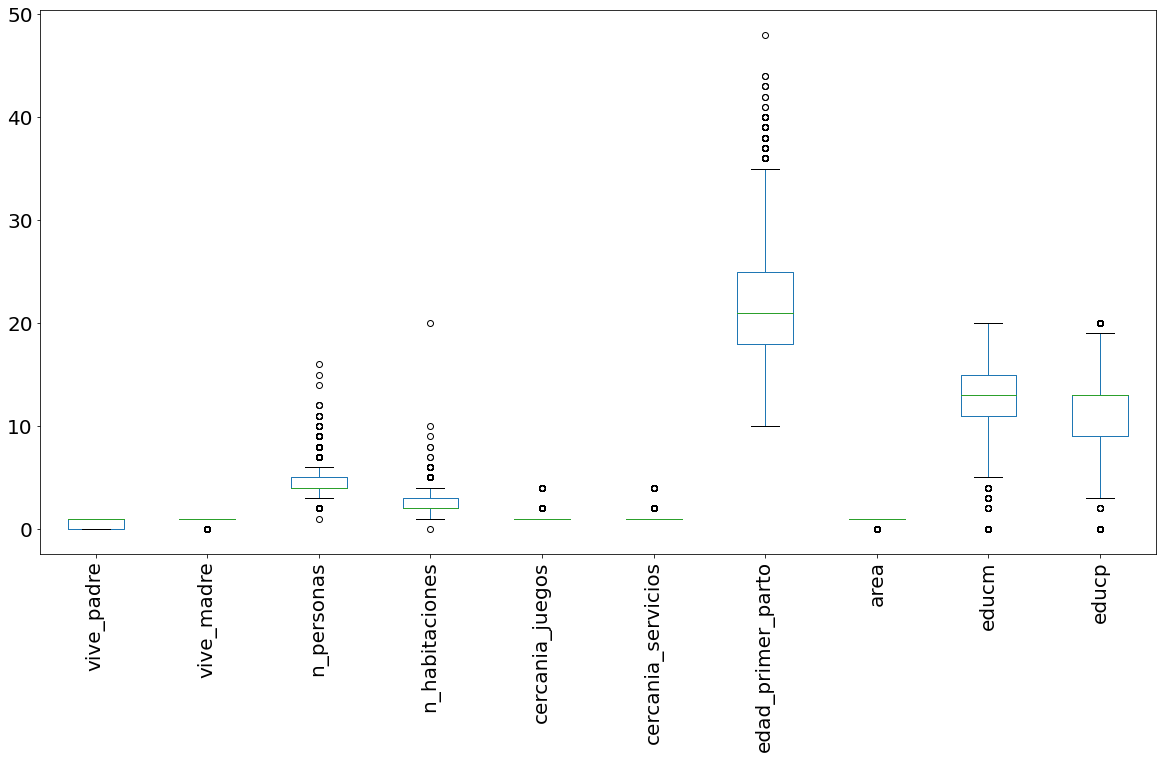

In [38]:
boxplot = junaeb.boxplot(grid=False,rot=90, fontsize=20,figsize =(20, 10))  

Se analizan las variables que presentan mayor outliers según análisis gráfico.

In [39]:
import plotly.express as px

fig1 = px.histogram(junaeb, x="n_personas", marginal="box")
fig1.show()
fig2 = px.histogram(junaeb, x="n_habitaciones", marginal="box")
fig2.show()
fig3 = px.histogram(junaeb, x="edad_primer_parto", marginal="box")
fig3.show()
fig4 = px.histogram(junaeb, x="cercania_servicios", marginal="box")
fig4.show()
fig5 = px.histogram(junaeb, x="educp", marginal="box")
fig5.show()
fig6 = px.histogram(junaeb, x="educm", marginal="box")
fig6.show()

Existen variables con datos demasiado atípicos por lo tanto se analizan y eliminan las tuplas con dichos datos 

In [40]:
junaeb.query('n_personas> 12')

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
426,0,1,16.0,2.0,1.0,1.0,17.0,1,8,20
851,1,1,14.0,2.0,1.0,1.0,17.0,0,12,10
896,1,1,15.0,2.0,1.0,1.0,20.0,0,16,13


In [41]:
junaeb = junaeb.drop(junaeb[junaeb['n_personas']>12].index)
junaeb.describe()

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
count,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000
mean,0.685293,0.973944,4.387537,2.584838,1.200283,1.150526,22.217548,0.900801,12.633182,11.194475
std,0.464436,0.159313,1.322085,0.900627,0.445885,0.409204,5.191535,0.298953,3.916350,5.270784
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,4.000000,2.000000,1.000000,1.000000,18.000000,1.000000,11.000000,9.000000
50%,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,21.000000,1.000000,13.000000,13.000000
75%,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,25.000000,1.000000,15.000000,13.000000
max,1.000000,1.000000,12.000000,20.000000,4.000000,4.000000,48.000000,1.000000,20.000000,20.000000


In [42]:
junaeb.query('n_habitaciones> 10')

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
808,1,1,3.0,20.0,1.0,1.0,24.0,1,13,17


In [43]:
junaeb = junaeb.drop(junaeb[junaeb['n_habitaciones']>10].index)
junaeb.describe()

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
count,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000
mean,0.685243,0.973940,4.387755,2.582104,1.200314,1.150549,22.217268,0.900785,12.633124,11.193564
std,0.464455,0.159325,1.322074,0.873859,0.445913,0.409232,5.191895,0.298974,3.916654,5.270696
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,4.000000,2.000000,1.000000,1.000000,18.000000,1.000000,11.000000,9.000000
50%,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,21.000000,1.000000,13.000000,13.000000
75%,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,25.000000,1.000000,15.000000,13.000000
max,1.000000,1.000000,12.000000,10.000000,4.000000,4.000000,48.000000,1.000000,20.000000,20.000000


In [44]:
junaeb.query('edad_primer_parto>45')

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
6440,1,1,5.0,5.0,2.0,1.0,48.0,1,9,9


In [45]:
junaeb = junaeb.drop(junaeb[junaeb['edad_primer_parto']>45].index)
junaeb.describe()

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
count,6369.000000,6369.000000,6369.000000,6369.000000,6369.000000,6369.000000,6369.000000,6369.000000,6369.000000,6369.000000
mean,0.685194,0.973936,4.387659,2.581724,1.200188,1.150573,22.213220,0.900769,12.633694,11.193908
std,0.464475,0.159337,1.322155,0.873402,0.445835,0.409260,5.182239,0.298995,3.916697,5.271038
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,4.000000,2.000000,1.000000,1.000000,18.000000,1.000000,11.000000,9.000000
50%,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,21.000000,1.000000,13.000000,13.000000
75%,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,25.000000,1.000000,15.000000,13.000000
max,1.000000,1.000000,12.000000,10.000000,4.000000,4.000000,44.000000,1.000000,20.000000,20.000000


# 2. OLS: Ordinary Least Squares

In [46]:
y=junaeb['vive_padre']
X=junaeb[['vive_madre','n_personas','n_habitaciones','cercania_juegos', 'cercania_servicios', 'edad_primer_parto', 'area', 'educm', 'educp']]
X=sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             vive_padre   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     145.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.01e-251
Time:                        23:34:22   Log-Likelihood:                -3555.8
No. Observations:                6369   AIC:                             7132.
Df Residuals:                    6359   BIC:                             7199.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1166      0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



##Análisis y explicación OLS

Según el Modelo de Cuadrados Ordinarios (OLS, por sus siglas en inglés), las variables significativas son: `vive_madre`, `n_personas`, `n_habitaciones`,`edad_primer_parto`, `area`, `educm` y `educp`. Estas son las que se consideran para incluir en el modelo. El modelo se presenta a continuación.

$ y_i = 0.1166 + 0.1184 x_1i + 0.0592 x_2i - 0.0478 x_2i + 0.0096 x_6i - 0.0789 x_7i - 0.0160 x_8i + 0.0335 x_9i + ɛ_i $

El número de habitaciones, el área donde vive y los años de escolaridad de la madre explican negativamente a la variable "si el padre vive en el hogar". Por ejemplo, que el padre viva en el hogar disminuye en un 0,0160 cuando los años de escolaridad de la madre aumentan en 1 año.

En cambio, si la madre vive en el hogar, el número de personas, la edad del primer parto de la madre y los años de escolaridad del padre, explican positivamente la variable dependiente. Por ejemplo, que el padre viva en el hogar aumenta en 0,1184 cuando la madre vive en el hogar (toma el valor de 1).

El modelo entrega un R-cuadrado igual a 17,1%. Esto quiere decir que las variables control indican un mal asjute del modelo. Esto se puede explicar dado que MCO estima el modelo asumiendo que la variable dependiente es continua. Además, el error se estima como una distribución normal. Esto no es correcto cuando la variable de resultado es binaria, tal como sucede en este caso.

# 3. Probit

In [47]:
model = sm.Probit(y, X)
probit_model = model.fit()
print(probit_model.summary())

mfx = probit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.537183
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6369
Model:                         Probit   Df Residuals:                     6359
Method:                           MLE   Df Model:                            9
Date:                Wed, 14 Sep 2022   Pseudo R-squ.:                  0.1376
Time:                        23:34:28   Log-Likelihood:                -3421.3
converged:                       True   LL-Null:                       -3967.2
Covariance Type:            nonrobust   LLR p-value:                2.772e-229
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2239      0.175     -7.004      0.000      -1.566      -0.881
vive_

##Análisis y explicación Probit

En este modelo, los valores de los coeficientes β no entrega información relevante, pero lo que interesa son la significancia y el efecto marginal. Dicho esto, los resultados del modelo indican que las variables significativas son: `vive_madre`, `n_personas`, `n_habitaciones`,`edad_primer_parto`, `area`, `educm` y `educp`.

Analizando los efectos marginales, se puede observar que el número de habitaciones, el área donde vive y los años de escolaridad de la madre explican negativamente a la variable "si el padre vive en el hogar". Por ejemplo, mientras mayor sean los años de escolaridad de la madre, disminuye en un 1,57% la probabilidad de que el padre viva en el hogar. 

En cambio, si la madre vive en el hogar, el número de personas, la edad del primer parto de la madre y los años de escolaridad del padre, explican positivamente la variable dependiente. Por ejemplo, si la madre vive en el hogar, aumenta en 10,08% la probabilidad de que el padre viva en el hogar.

El Pseudo R-squ entrega un valor de 0.1376. Dado que este resultado se encuentra más cerca del 0 que del 1, se considera el modelo no tiene buen ajuste ni tampoco capacidad predictiva.

       


# 4. Logit

In [48]:
model = sm.Logit(y, X)
logit_model = model.fit()
print(logit_model.summary())

mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.534919
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6369
Model:                          Logit   Df Residuals:                     6359
Method:                           MLE   Df Model:                            9
Date:                Wed, 14 Sep 2022   Pseudo R-squ.:                  0.1412
Time:                        23:34:32   Log-Likelihood:                -3406.9
converged:                       True   LL-Null:                       -3967.2
Covariance Type:            nonrobust   LLR p-value:                1.663e-235
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1360      0.299     -7.146      0.000      -2.722      -1.550
vive_

## Análisis y explicación Logit

En este modelo, los valores de los coeficientes β no entrega información relevante, pero lo que interesa son la significancia y el efecto marginal. Dicho esto, los resultados del modelo indican que las variables significativas son: `vive_madre`, `n_personas`, `n_habitaciones`,`edad_primer_parto`, `area`, `educm` y `educp`.

Analizando los efectos marginales, se puede observar que el número de habitaciones, el área donde vive y los años de escolaridad de la madre explican negativamente a la variable "si el padre vive en el hogar". Por ejemplo, mientras mayor sean los años de escolaridad de la madre, disminuye en un 1,69% la probabilidad de que el padre viva en el hogar. 

En cambio, si la madre vive en el hogar, el número de personas, la edad del primer parto de la madre y los años de escolaridad del padre, explican positivamente la variable dependiente. Por ejemplo, el efecto marginal de que la madre viva en el hogar aumenta en 10,58% la probabilidad de que el padre viva en el hogar.

El Pseudo R-squ entrega un valor de 0.1412. Dado que este resultado se encuentra más cerca del 0 que del 1, se considera el modelo no tiene buen ajuste ni tampoco capacidad predictiva.

# 5. Discusión modelos OLS, Probit y Logit

El modelo estimado con MCO tiene la desventaja de que no necesariamente va a ser capaz de predecir valores entre 0 y 1 ya que, como se mencionó anteriormente, asumen que el error se distribuye normalmente. Esto es incorrecto cuando la variable resultado es binaria dado que no tiene una distribución normal y, por lo tanto, ɛ tampoco.

Las variables binarias se pueden expresar como el resultado de una variable latente (que no se observa) que sea continua. La variable latente, denotada por $ y^*_i $, se observa directamente en los modelos lineales. En los modelos de variable dependiente limitada, solo se observan 2 valores, los cuales corresponden al valor de $ y_i $ si es que la variable latente cruza algún umbral. 

Para estimar este tipo de modelos, se necesita asumir alguna función de distribución de probabilidades para $ ɛ_i $. De esta forma, se le puede asignar una probabilidad de ocurrencia a $ y_i = 1 $ y a $ y_i = 0 $. Dichos modelos son el Modelo Probit y el Modelo Logit.

En el modelo Probit, a diferencia del MCO, no existen expresiones algebraicas para β, así que se estima por máxima verosimilitud (likelihood) con métodos numéricos. Esta función obtinene los parámteros que hace que la probabilidad de obtener la data observada sea máxima. Los parámetros estimados no representan cambio marginal, dada la forma no lineal. A pesar de que este modelo pueda llegar a ser bastante útiles, pueden ser computacionalmente complejos.

El modelo Logit, asume una distribución logística. Al igual que en el caso de Probit, los efectos marginales en el modelo Logit dependen de la función de distribución marginal y no tanto de los valores de $ x $.

En el caso estudiado, los tres modelos entregaron resutados similares, ya que consideran como significantes las mismas variables y en valores parecidos. Según el $ R^2 $ (en OLS) y el pseudo $ R^2 $ (en probit y logit), ninguno de los tres modelos tiene un buen ajuste, por lo que no se recomiendan para el uso de análisis estadístico

# 6. Poisson

In [49]:
y=junaeb['n_personas']
X=junaeb[['vive_padre','vive_madre','n_habitaciones','cercania_juegos', 'cercania_servicios', 'edad_primer_parto', 'area', 'educm', 'educp']]
poisson=sm.GLM(y,X,family=sm.families.Poisson()).fit()
print(poisson.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6369
Model:                            GLM   Df Residuals:                     6360
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11607.
Date:                Wed, 14 Sep 2022   Deviance:                       2105.2
Time:                        23:34:36   Pearson chi2:                 2.30e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
vive_padre             0.1196      0

In [50]:
print("fitted lambda")
print(poisson.mu)

fitted lambda
[4.98201721 4.24817935 4.86373988 ... 3.2687975  3.8543365  4.1547504 ]


## Análisis y explicación Poisson



Dado el resumen del modelo Poisson se puede determinar que las variables "años de escolaridad de la madre" (educm) y "años de escolaridad del padre" (educp) no son significativas puesto que su valor-p es mayor a 0,05 o nivel de significancia mayor a 5%. Por ende las otras 7 variables deberían incluirse en el modelo para analizar el número de personas que vive en el hogar. 
En este caso un aumento en el numero de habitaciones traería consigo un aumento porcentual en el número de personas que vive en el hogar. 

# 7. Test overdispersion

In [51]:
y=junaeb['n_personas']
X=junaeb[['vive_padre','vive_madre','n_habitaciones','cercania_juegos', 'cercania_servicios', 'edad_primer_parto', 'area', 'educm', 'educp']]

aux=((y-poisson.mu)**2-poisson.mu)/poisson.mu
auxr=sm.OLS(aux,poisson.mu).fit()
print(auxr.params)


x1   -0.143674
dtype: float64


## Test Overdispersion

Dado el test de overdispersión el posible valor de alpha para un modelo Binomial Negativa es de alpha=-0,11 

# 8. Binomial Negativa

In [52]:
negbin=sm.GLM(y,X,family=sm.families.NegativeBinomial()).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6369
Model:                            GLM   Df Residuals:                     6360
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16436.
Date:                Wed, 14 Sep 2022   Deviance:                       395.91
Time:                        23:34:45   Pearson chi2:                     448.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
vive_padre             0.1274      0

In [ ]:
print("fitted lambda")
print(negbin.mu)

fitted lambda
[5.04153487 4.2565593  4.88327869 ... 3.28197827 3.85644691 4.18155578]


## Análisis y explicación Binomial Negativa


En este caso no resultan significativas las variables edad_primer_parto, educm, educp. Por lo tanto en el modelo final se deberín incluir todas las demás variables para explicar el numero de personas en el hogar. 
Por ejemplo un aumento en el numero de habitaciones presentes en el hogar podría inducir a un aumento en el número de personas que viven en el hogar. 

# 9. Discusión modelo Poisson, Test Overdispersión y modelo Binomial Negativa

Dados los resultados anteriores es evidente que no presentan los mismos resultados. En el caso del modelo Poisson se incluye la edad del primer parto. Luego en el modelo Binomial Negativa se exluye como variable significativa. Una desventaja evidente del modelo Poisson es que se permite que la varianza condicional de Y sea igual que la media. Por ende se debería considerar el modelo Binomial Negativa e incorporar las variables vive_padre, vive_madre, n_habitaciones, cercania_juegos, cercania_servicios, y area como variables significativas para explicar el número de personas en el hogar. 